In [1]:
%run -i ch03.py

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

X, y = shuffled
X.shape, y.shape

((60000, 784), (60000,))

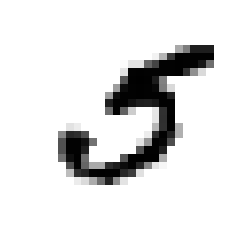

In [3]:
visualize_mnist(train, 36000)

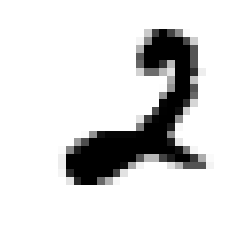

In [4]:
visualize_mnist(shuffled, 36000)

In [5]:
y[36000]

2

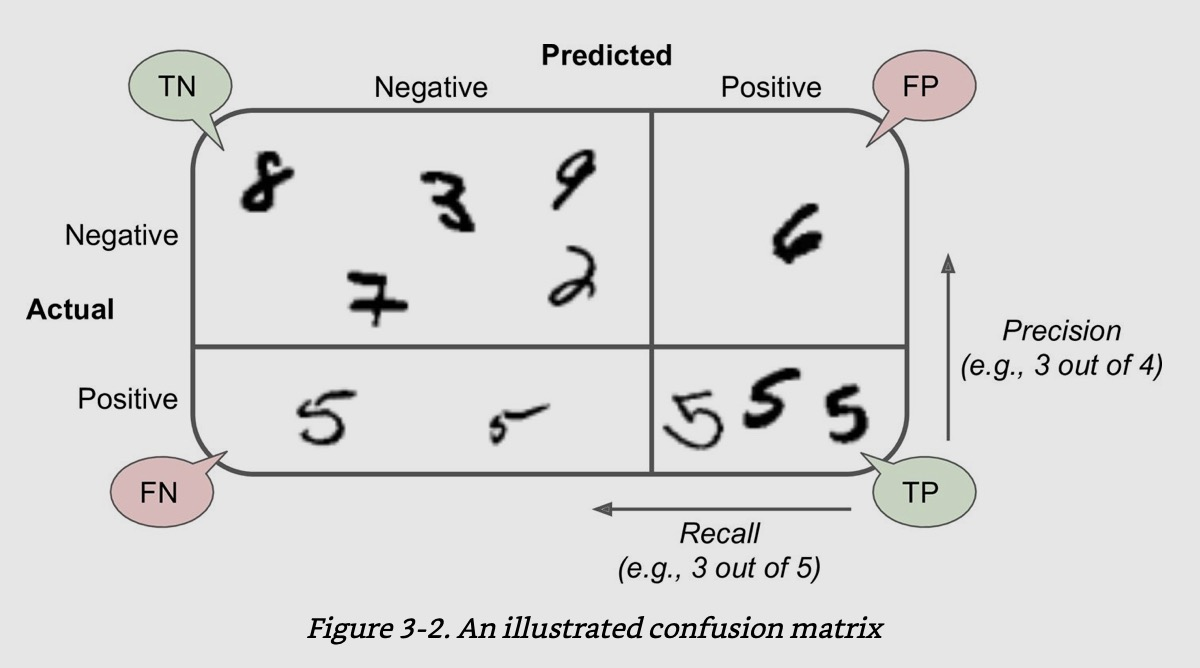

In [6]:
from IPython.display import Image
from const import PATH_SCREENSHOTS
Image(f'{PATH_SCREENSHOTS}/ch03/confusion.jpg', width=500)

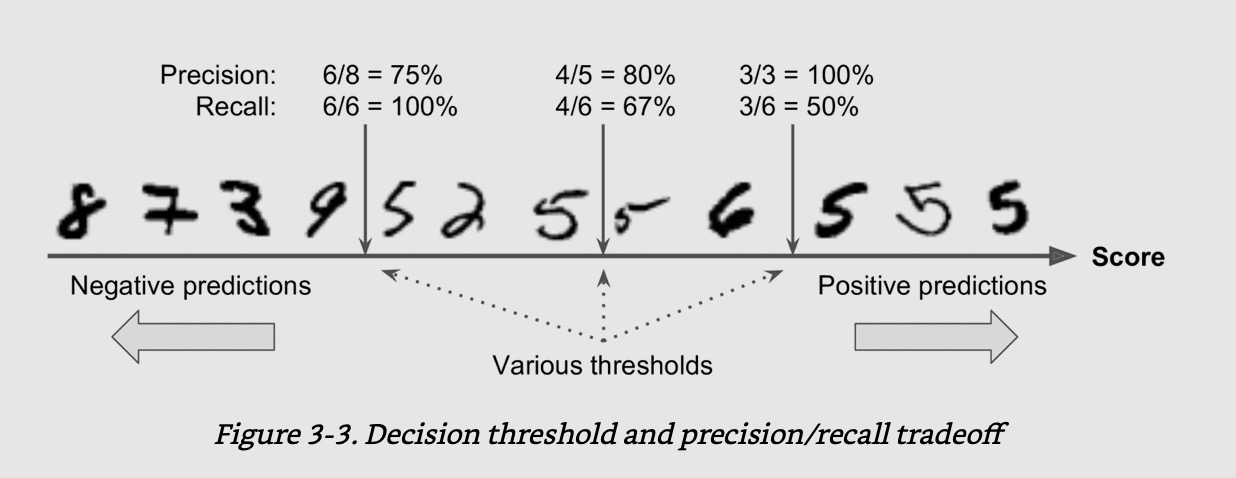

In [7]:
Image(f'{PATH_SCREENSHOTS}/ch03/thresholds.jpg', width=500)

In [8]:
features = X
labels = (y_ == 5)

from sklearn.linear_model import SGDClassifier

from const import METHOD_DECISION_FUNCTION
from models import ClassifierModel as CM

sgd = CM(SGDClassifier, max_iter=5, tol=-np.infty, random_state=42)
sgd.evaluate(features, labels, cv=3, method=METHOD_DECISION_FUNCTION)
print(sgd)
print(repr(sgd))

Generic model with algorithm: SGDClassifier
<models.ClassifierModel object at 0x11bc6e828>: SGDClassifier,
size: 60000.00, auc: 0.91, sensitivity: 0.85, specificity: 0.97, precision: 0.72


In [9]:
def prc_graph(p, r, t, show=True):
    if show:
        plt.figure(figsize=(8, 4))
    plt.plot(t, p, 'b--', label="Precision")
    plt.plot(t, r, 'g-', label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="center left")
    plt.ylim([0, 1])
    plt.xlim([-700000, 700000])
    if show:
        plt.show()
    
def pr_graph(p, r, show=True):
    if show:
        plt.figure(figsize=(8, 4))
    plt.plot(r, p, 'b-', label="Precision")
    plt.xlabel("Recall")
    plt.legend(loc="center left")
    plt.ylim([0, 1])
    plt.xlim([0, 1])
    if show:
        plt.show()
    
def roc_graph(fpr, tpr, label=None, show=True):
    if show:
        plt.figure(figsize=(8, 4))
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel("False Positive Rate (1 - Specificity)")
    plt.ylabel("True Positive Rate (Sensitivity)")
    if show:
        plt.show()

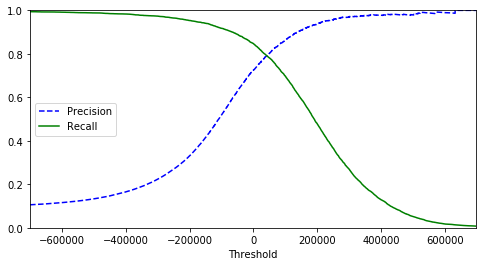

In [10]:
p, r, th = sgd.pc_curve()

prc_graph(p[:-1], r[:-1], th)

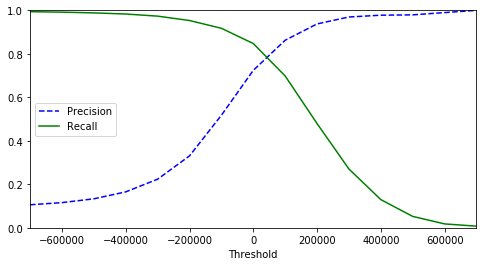

In [11]:
from sklearn.metrics import precision_score, recall_score

ths = [100000 * (x - 7) for x in range(15)]

ps = []
rs = []
zs = []
for th in ths:
    z = (sgd.scores > th)
    ps.append(precision_score(labels, z))
    rs.append(recall_score(labels, z))
    zs.append(z[z==True].shape[0])

prc_graph(ps, rs, ths)

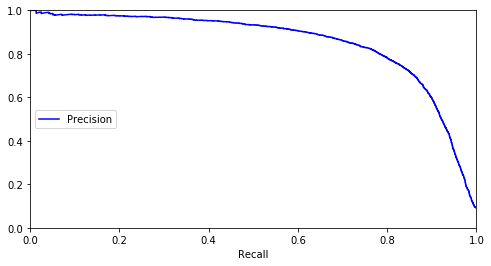

In [12]:
pr_graph(p, r)

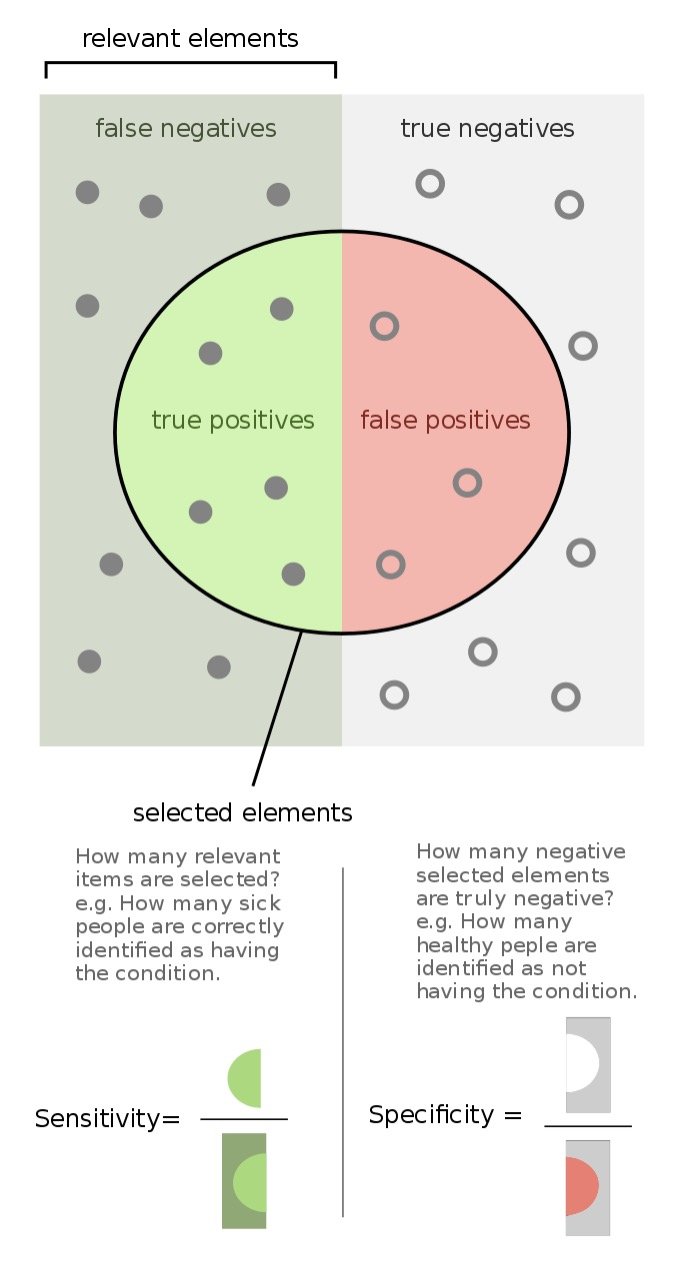

In [13]:
Image(f'{PATH_SCREENSHOTS}/ch03/specificity.jpg', width=300)

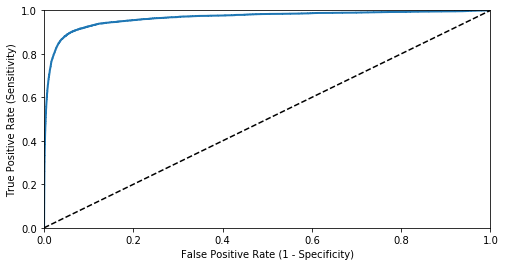

In [14]:
fpr, tpr, th = sgd.roc_curve()
roc_graph(fpr, tpr)

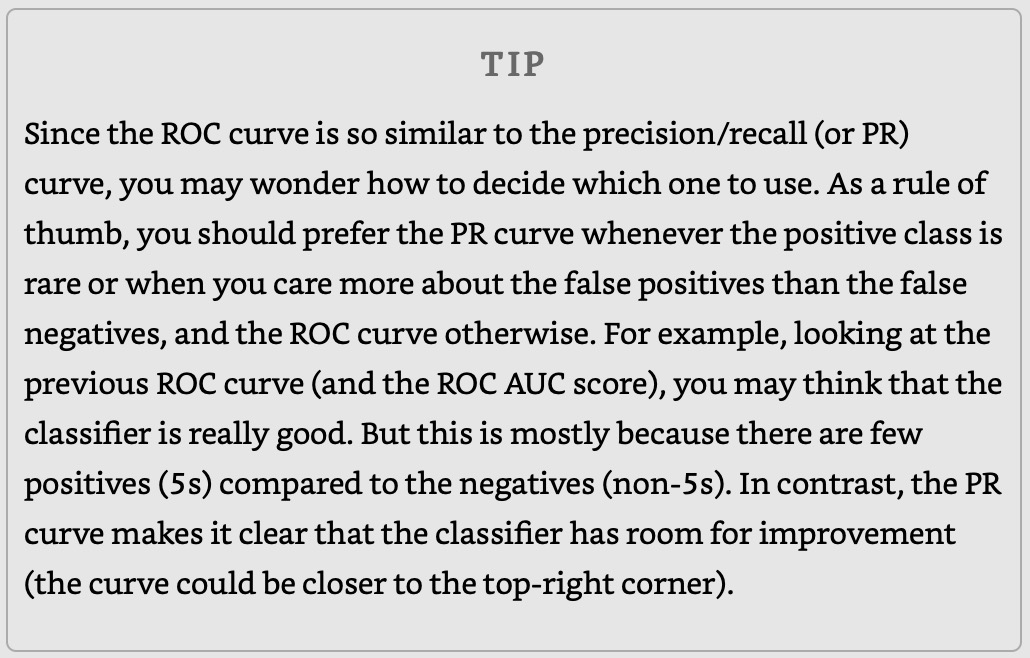

In [15]:
Image(f'{PATH_SCREENSHOTS}/ch03/pr_roc.jpg', width=500)

In [16]:
from sklearn.ensemble import RandomForestClassifier
from const import METHOD_PREDICT_PROBA

rf = CM(RandomForestClassifier, n_estimators=10, random_state=42)
rf.evaluate(features, labels, cv=3, method=METHOD_PREDICT_PROBA)

In [17]:
print(sgd)
print(repr(sgd))
print('-------')
print(rf)
print(repr(rf))

Generic model with algorithm: SGDClassifier
<models.ClassifierModel object at 0x11bc6e828>: SGDClassifier,
size: 60000.00, auc: 0.91, sensitivity: 0.85, specificity: 0.97, precision: 0.72
-------
Generic model with algorithm: RandomForestClassifier
<models.ClassifierModel object at 0x11c9d8390>: RandomForestClassifier,
size: 60000.00, auc: 0.91, sensitivity: 0.82, specificity: 1.00, precision: 0.98


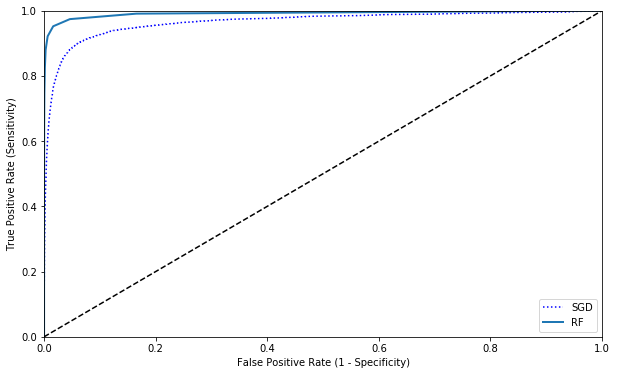

In [18]:
fprf, tprf, thf = rf.roc_curve()

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, 'b:', label="SGD")
roc_graph(fprf, tprf, label="RF", show=False)
plt.legend(loc='lower right')
plt.show()

In [19]:
print(rf.model.classes_)

i = np.argwhere(labels==True)[0][0]
j = np.argwhere(labels==False)[0][0]

print(i, j)

print(labels[i])
print(sgd.model.decision_function([features[i]]))
print(rf.model.predict_proba([features[i]]))
print(labels[j])
print(sgd.model.decision_function([features[j]]))
print(rf.model.predict_proba([features[j]]))

[False  True]
12 0
True
[73426.33543094]
[[0.1 0.9]]
False
[-246735.19334488]
[[1. 0.]]


In [20]:
# in the multiclass case, with algorithms that use decision_function,
# sklearn will actually run ovr under the hood (ovo in the case of svm based classifiers)

sgdm = CM(SGDClassifier, max_iter=5, tol=-np.infty, random_state=42)
sgdm.evaluate(features, y, cv=3, method=METHOD_DECISION_FUNCTION)

In [21]:
# in the multiclass case, with algorithms that use predict_proba,
# sklearn does not need to run ovo or ovr under the hood

rfm = CM(RandomForestClassifier, n_estimators=10, random_state=42)
rfm.evaluate(features, y, cv=3, method=METHOD_PREDICT_PROBA)

In [22]:
print(rfm.model.classes_)

i = np.argwhere(y==5)[0][0]
j = np.argwhere(y!=5)[0][0]

print(i, j)

print(y[i])
print(sgdm.model.decision_function([features[i]]))
print(rfm.model.predict_proba([features[i]]))
print(y[j])
print(sgdm.model.decision_function([features[j]]))
print(rfm.model.predict_proba([features[j]]))

[0 1 2 3 4 5 6 7 8 9]
12 0
5
[[ -635816.4082741   -649999.44528281  -922329.78786276  -202655.0528327
   -515774.54180901    73426.33543094 -1292034.16446946  -354353.5414656
   -222208.49023332   117274.55657765]]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
2
[[ -924648.49741724  -153457.92853361    -7060.8667036   -381168.37015269
  -1114845.23639601  -246735.19334488  -334007.72584346  -841683.26681349
    -80297.81943375  -835801.89882582]]
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


In [23]:
print('SGD', sgd.cv_score())
print('RF', rf.cv_score())
print('SGDM', sgdm.cv_score())
print('RFM', rfm.cv_score())

SGD [0.968  0.9573 0.9458]
RF [0.98395 0.98325 0.98145]
SGDM [0.86672665 0.87274364 0.85567835]
RFM [0.94346131 0.9419471  0.9366405 ]
